In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pymc as pm

In [4]:
# Load the dataset
data_path = '../src/data/BrentOilPrices.csv'
df = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')

# Define the major events
events = {
    '1990-08-02': 'Gulf War',
    '1997-07-02': 'Asian Financial Crisis',
    '2001-09-11': '9/11 Attacks',
    '2003-03-20': 'Iraq War',
    '2008-09-15': 'Global Financial Crisis',
    '2010-12-17': 'Arab Spring',
    '2020-03-11': 'COVID-19 Pandemic',
    '2022-02-24': 'Russia-Ukraine Conflict',
    '1999-11-02': 'OPEC production cuts',
    '2004-05-04': 'Middle East instability',
    '2005-06-16': 'Increase in U.S. petroleum reserves',
    '2007-09-12': 'Global financial turmoil',
    '2008-03-06': 'Oil prices peak amid supply fears',
    '2008-10-08': 'Financial crisis deepens',
    '2009-05-29': 'Economic recovery signs',
    '2010-12-21': 'Arab Spring begins',
    '2014-09-08': 'Oil prices decline due to oversupply',
    '2014-12-02': 'OPEC decides not to cut production',
    '2015-08-04': 'Continued oil price decline',
    '2017-09-19': 'Increase in U.S. oil production',
    '2020-03-09': 'Oil price war between Russia and Saudi Arabia',
    '2020-05-29': 'Partial oil price recovery',
    '2021-02-03': 'Oil price recovery amid vaccine rollouts',
    '2022-01-14': 'Geopolitical tensions and supply concerns'
}

C:\Users\Abeni\AppData\Local\Temp\ipykernel_2168\2128636694.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(data_path, parse_dates=['Date'], index_col='Date')


Brent Oil Prices with Detected Change Points

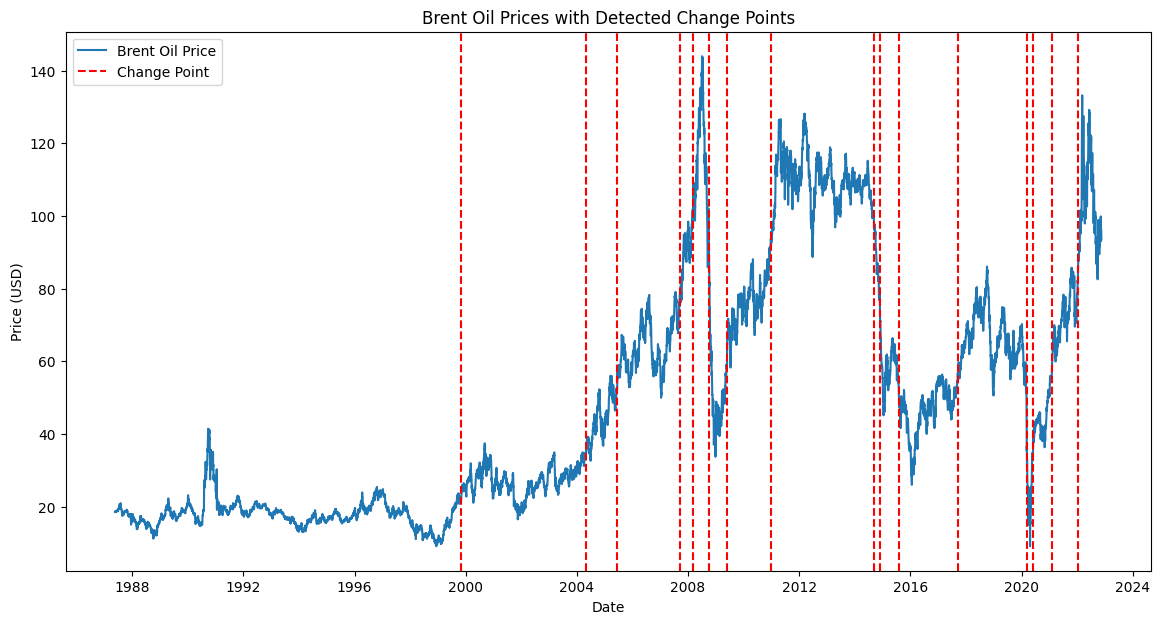

In [4]:
# Detect change points using ruptures
price_array = df['Price'].values
model = "rbf"
algo = rpt.Pelt(model=model).fit(price_array)
change_points = algo.predict(pen=20)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Price'], label='Brent Oil Price')
for cp in change_points[:-1]:
    plt.axvline(x=df.index[cp], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices with Detected Change Points')
plt.legend()
plt.show()

Compare the Detected Change Points with Events

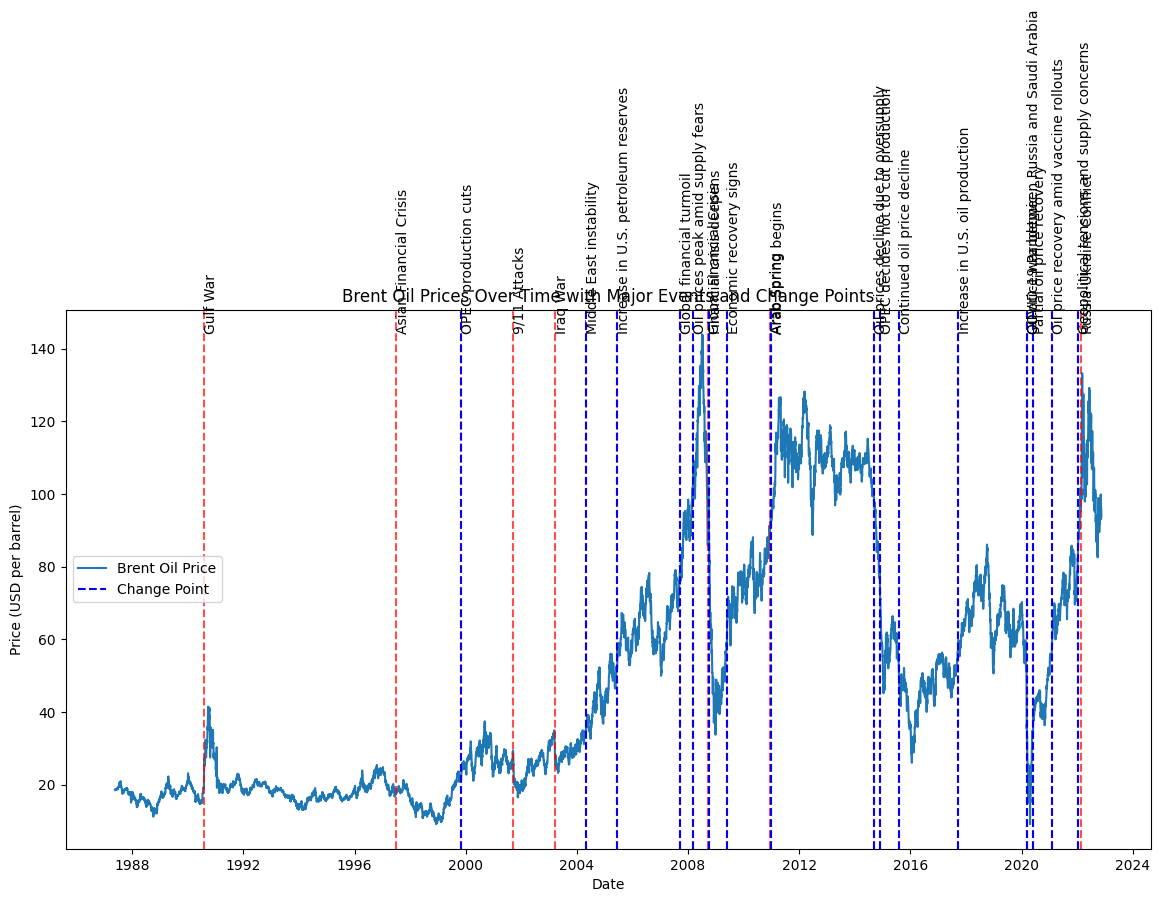

Detected Change Point: 1999-11-02 00:00:00, Event: OPEC production cuts
Detected Change Point: 2004-05-04 00:00:00, Event: Middle East instability
Detected Change Point: 2005-06-16 00:00:00, Event: Increase in U.S. petroleum reserves
Detected Change Point: 2007-09-12 00:00:00, Event: Global financial turmoil
Detected Change Point: 2008-03-06 00:00:00, Event: Oil prices peak amid supply fears
Detected Change Point: 2008-10-08 00:00:00, Event: Financial crisis deepens
Detected Change Point: 2009-05-29 00:00:00, Event: Economic recovery signs
Detected Change Point: 2010-12-21 00:00:00, Event: Arab Spring begins
Detected Change Point: 2014-09-08 00:00:00, Event: Oil prices decline due to oversupply
Detected Change Point: 2014-12-02 00:00:00, Event: OPEC decides not to cut production
Detected Change Point: 2015-08-04 00:00:00, Event: Continued oil price decline
Detected Change Point: 2017-09-19 00:00:00, Event: Increase in U.S. oil production
Detected Change Point: 2020-03-09 00:00:00, Even

In [7]:
# Add event markers
df['Event'] = df.index.map(lambda x: events[x.strftime('%Y-%m-%d')] if x.strftime('%Y-%m-%d') in events else 'No Event')

# Visualizing the data with events and change points
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Price'], label='Brent Oil Price')
for date, event in events.items():
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--', alpha=0.7)
    plt.text(pd.to_datetime(date), df['Price'].max(), event, rotation=90, verticalalignment='bottom')
for cp in change_points[:-1]:
    plt.axvline(x=df.index[cp], color='blue', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Brent Oil Prices Over Time with Major Events and Change Points')
plt.legend()
plt.show()

# Print detected change points and corresponding events
detected_events = df.index[change_points[:-1]]
for cp in detected_events:
    event = events.get(cp.strftime('%Y-%m-%d'), 'No Event')
    print(f"Detected Change Point: {cp}, Event: {event}")

The time difference between each change point and the nearest event date

Change Point: 1999-11-02 00:00:00, Nearest Event: 1999-11-02 00:00:00, Time Difference: 0 days
Change Point: 2004-05-04 00:00:00, Nearest Event: 2004-05-04 00:00:00, Time Difference: 0 days
Change Point: 2005-06-16 00:00:00, Nearest Event: 2005-06-16 00:00:00, Time Difference: 0 days
Change Point: 2007-09-12 00:00:00, Nearest Event: 2007-09-12 00:00:00, Time Difference: 0 days
Change Point: 2008-03-06 00:00:00, Nearest Event: 2008-03-06 00:00:00, Time Difference: 0 days
Change Point: 2008-10-08 00:00:00, Nearest Event: 2008-10-08 00:00:00, Time Difference: 0 days
Change Point: 2009-05-29 00:00:00, Nearest Event: 2009-05-29 00:00:00, Time Difference: 0 days
Change Point: 2010-12-21 00:00:00, Nearest Event: 2010-12-21 00:00:00, Time Difference: 0 days
Change Point: 2014-09-08 00:00:00, Nearest Event: 2014-09-08 00:00:00, Time Difference: 0 days
Change Point: 2014-12-02 00:00:00, Nearest Event: 2014-12-02 00:00:00, Time Difference: 0 days
Change Point: 2015-08-04 00:00:00, Nearest Event: 

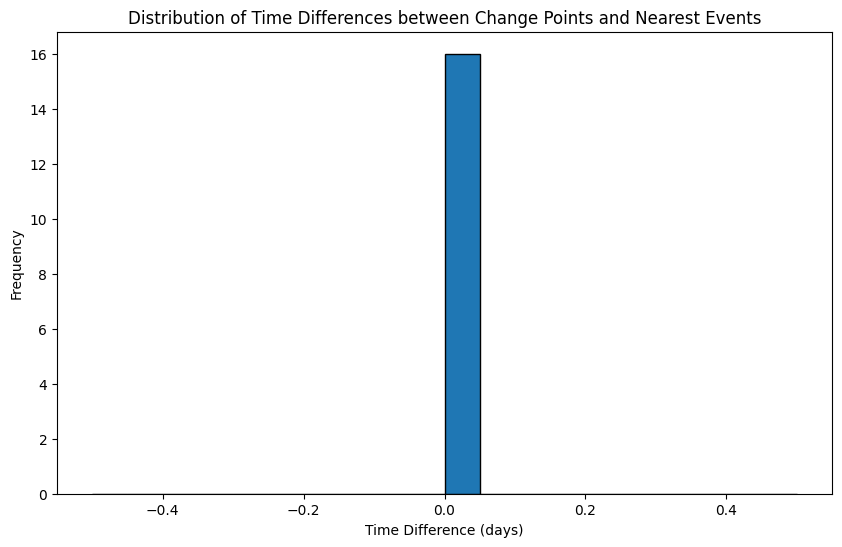

In [8]:
# Convert event dates and change points to datetime format
event_dates = pd.to_datetime(list(events.keys()))
change_point_dates = df.index[change_points[:-1]]

# Calculate the time difference between each change point and the nearest event date
time_diffs = []
for cp in change_point_dates:
    nearest_event = min(event_dates, key=lambda x: abs(x - cp))
    time_diff = abs((nearest_event - cp).days)
    time_diffs.append(time_diff)
    print(f"Change Point: {cp}, Nearest Event: {nearest_event}, Time Difference: {time_diff} days")

# Analyze the distribution of time differences
plt.figure(figsize=(10, 6))
plt.hist(time_diffs, bins=20, edgecolor='k')
plt.xlabel('Time Difference (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences between Change Points and Nearest Events')
plt.show()

Bayesian Change Point Detection using PyMC

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mean_prior]
>Metropolis: [change_point]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3489 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


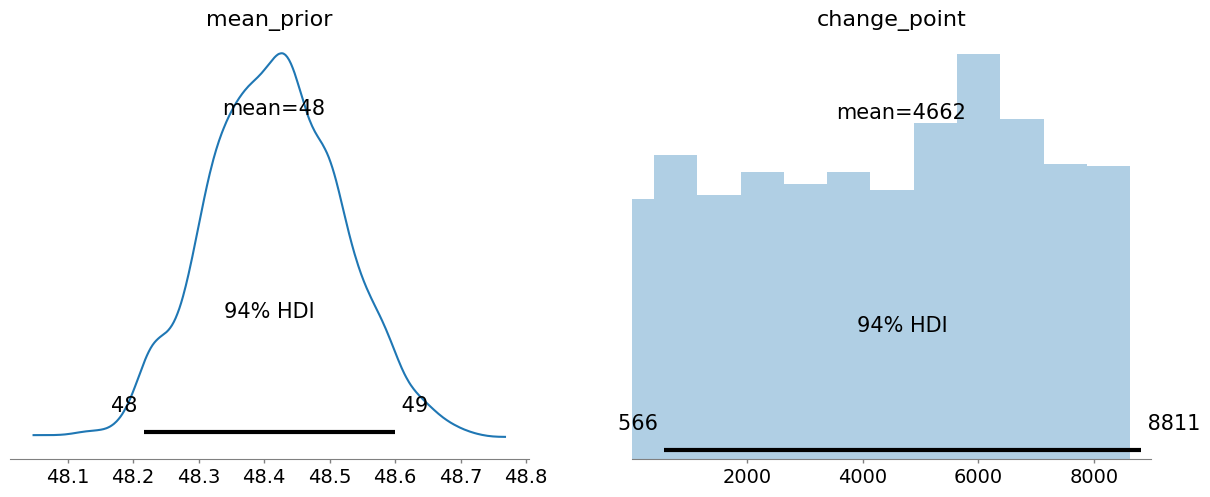

In [5]:
# Bayesian Change Point Detection using PyMC
mean_price = df['Price'].mean()

with pm.Model() as model:
    # Priors
    mean_prior = pm.Normal('mean_prior', mu=mean_price, sigma=10)
    change_point = pm.DiscreteUniform('change_point', lower=0, upper=len(df)-1)

    # Likelihood
    likelihood = pm.Normal('likelihood', mu=mean_prior, sigma=10, observed=df['Price'])

    # Inference
    trace = pm.sample(1000, tune=1000, cores=2)

# Plot results
pm.plot_posterior(trace)
plt.show()